# TAGS zu Pandas Workflow und Visualisierung

In [90]:
import pandas as pd
from gspread_pandas import Spread, Client
import pickle

spread = Spread("tags_ichbinsophiescholl")
df = spread.sheet_to_df(sheet="Archive")

df.columns
df.to_csv("../data/tags_corpus.csv")
df.to_pickle("../data/tags_corpus.pkl")


## Überblick

In [246]:
df = pd.read_csv("../data/tags_corpus.csv")
df.rename(columns={"time": "datetime"}, inplace=True)
df.head(3)


,id_str,from_user,text,created_at,datetime,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1471935455893544960,phlip_it,RT @historydefined: Pictured here are Hans Sch...,Fri Dec 17 20:08:54 +0000 2021,17/12/2021 20:08:54,NaN,NaN,NaN,NaN,386489054,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/2902971114...,302.0,386.0,Portugal,http://twitter.com/phlip_it/statuses/147193545...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
1,1471897786492850176,AnthonyChipole2,Sophie Scholl and the White Rose | The Nationa...,Fri Dec 17 17:39:13 +0000 2021,17/12/2021 17:39:13,NaN,NaN,NaN,NaN,1194162316746645504,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1351091956...,91.0,185.0,Pittsburgh PA,http://twitter.com/AnthonyChipole2/statuses/14...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]..."
2,1471874775572172804,AnnaLizzy68,RT @historydefined: Pictured here are Hans Sch...,Fri Dec 17 16:07:47 +0000 2021,17/12/2021 16:07:47,NaN,NaN,NaN,NaN,831219408509030400,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/8370287270...,3607.0,4181.0,"Puglia, Italia",http://twitter.com/AnnaLizzy68/statuses/147187...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."


In [194]:
df.tail(3)

,id_str,from_user,text,created_at,datetime,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
380,1460308886913785859,QkrSocialist,Radical Poet: Heinrich Heine. Recommended by W...,Mon Nov 15 18:09:04 +0000 2021,15/11/2021 18:09:04,NaN,NaN,NaN,NaN,2965978042,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1250582111...,5516.0,5105.0,NaN,http://twitter.com/QkrSocialist/statuses/14603...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]..."
381,1460305184043802629,chrisusanz,Who cares! Sophie Scholl and the White Rose m...,Mon Nov 15 17:54:21 +0000 2021,15/11/2021 17:54:21,NaN,NaN,NaN,NaN,342459363,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1580515215...,190.0,190.0,"Sugar Land, TX",http://twitter.com/chrisusanz/statuses/1460305...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]..."
382,1460305184043802629,chrisusanz,Who cares! Sophie Scholl and the White Rose m...,Mon Nov 15 17:54:21 +0000 2021,15/11/2021 17:54:21,NaN,NaN,NaN,NaN,342459363,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1580515215...,190.0,190.0,"Sugar Land, TX",http://twitter.com/chrisusanz/statuses/1460305...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]..."


In [195]:
df.shape


(383, 18)

## Datetime-Spalte konvertieren

In [247]:
df["date"] = pd.to_datetime(df["datetime"], format="%d/%m/%Y %H:%M:%S")
df["day"] = df["date"].dt.date
df["time"] = df["date"].dt.time
df.sort_values(by="day", inplace=True, ignore_index=True)

# Look at first and last row
pd.concat([df.head(1), df.tail(1)])


,id_str,from_user,text,created_at,datetime,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,...,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,date,day,time
0,1460305184043802629,chrisusanz,Who cares! Sophie Scholl and the White Rose m...,Mon Nov 15 17:54:21 +0000 2021,15/11/2021 17:54:21,NaN,NaN,NaN,NaN,342459363,...,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1580515215...,190.0,190.0,"Sugar Land, TX",http://twitter.com/chrisusanz/statuses/1460305...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",2021-11-15 17:54:21,2021-11-15,17:54:21
382,1471935455893544960,phlip_it,RT @historydefined: Pictured here are Hans Sch...,Fri Dec 17 20:08:54 +0000 2021,17/12/2021 20:08:54,NaN,NaN,NaN,NaN,386489054,...,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/2902971114...,302.0,386.0,Portugal,http://twitter.com/phlip_it/statuses/147193545...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",2021-12-17 20:08:54,2021-12-17,20:08:54


## Tweets pro Tag

In [272]:
# Da die Daten nur aus 2021 sind, möchte ich mir gerne den Platz beim Plotten sparen und erstelle deshalb hier eine neue Spalte

df["day_without_year"] = df["date"].dt.strftime("%d.%m.")
tweets_per_day = df.groupby(["day", "day_without_year"], as_index=False)[
    "text"].count()
tweets_per_day.rename(columns={"text": "tweet_count"}, inplace=True)
tweets_per_day.head()


,day,day_without_year,tweet_count
0,2021-11-15,15.11.,7
1,2021-11-16,16.11.,1
2,2021-11-17,17.11.,5
3,2021-11-18,18.11.,13
4,2021-11-19,19.11.,11


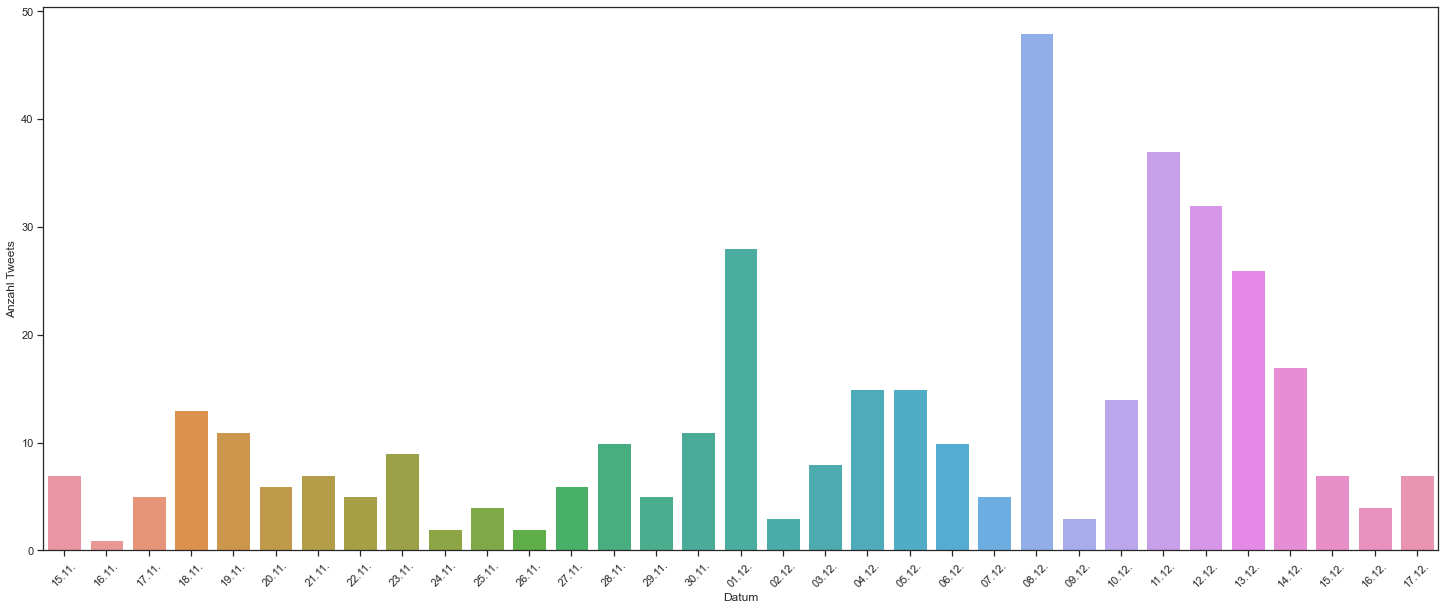

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
sns.set_theme(rc={"figure.figsize": (25, 10)},
              style="ticks", palette="pastel")

X = tweets_per_day["day_without_year"]
Y = tweets_per_day["tweet_count"]

tpd = sns.barplot(data=tweets_per_day, x=X, y=Y)
tpd.set_xticklabels(tpd.get_xticklabels(), rotation=45, ha="center")
tpd.set(xlabel="Datum", ylabel="Anzahl Tweets")

fig = tpd.get_figure()
fig.savefig('../output/tags/tweets_per_day.png', bbox_inches='tight')